In [329]:
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
import matplotlib.pyplot as plt

## Check for missing data

In [308]:
missing_values = ["?","nan"]
df=pd.read_csv('processed.cleveland.data',header=None, na_values = missing_values)
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    4
12    2
13    0
dtype: int64

In [309]:
df=df.dropna()

In [310]:
df
#4 is chol: serum cholestoral in mg/dl
#7 is thalach: maximum heart rate achieved
#3 is trestbps: resting blood pressure (in mm Hg on admission to the hospital)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


## Data Dictionary

In [311]:
with open('heart-disease.names', 'r') as description:
    names = description.readlines()
for i in names:
    print(i)

Publication Request: 

   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

   This file describes the contents of the heart-disease directory.



   This directory contains 4 databases concerning heart disease diagnosis.

   All attributes are numeric-valued.  The data was collected from the

   four following locations:



     1. Cleveland Clinic Foundation (cleveland.data)

     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)

     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)

     4. University Hospital, Zurich, Switzerland (switzerland.data)



   Each database has the same instance format.  While the databases have 76

   raw attributes, only 14 of them are actually used.  Thus I've taken the

   liberty of making 2 copies of each database: one with all the attributes

   and 1 with the 14 attributes actually used in past experiments.



   The authors of the databases have requested:



      ...that any publications resultin

In [312]:
df[13].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: 13, dtype: int64

## original dimensions

In [313]:
import numpy as np
np.linalg.matrix_rank(df)

14

## Center the Data

In [314]:
X=df.iloc[:,0:13]
y=df.iloc[:,13]
centered_data = X - X.mean(axis=0)
centered_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8.457912,0.323232,-2.158249,13.306397,-14.350168,0.855219,1.003367,0.400673,-0.326599,1.244444,1.397306,-0.676768,1.26936
1,12.457912,0.323232,0.841751,28.306397,38.649832,-0.144781,1.003367,-41.599327,0.673401,0.444444,0.397306,2.323232,-1.73064
2,12.457912,0.323232,0.841751,-11.693603,-18.350168,-0.144781,1.003367,-20.599327,0.673401,1.544444,0.397306,1.323232,2.26936
3,-17.542088,0.323232,-0.158249,-1.693603,2.649832,-0.144781,-0.996633,37.400673,-0.326599,2.444444,1.397306,-0.676768,-1.73064
4,-13.542088,-0.676768,-1.158249,-1.693603,-43.350168,-0.144781,1.003367,22.400673,-0.326599,0.344444,-0.602694,-0.676768,-1.73064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2.457912,-0.676768,0.841751,8.306397,-6.350168,-0.144781,-0.996633,-26.599327,0.673401,-0.855556,0.397306,-0.676768,2.26936
298,-9.542088,0.323232,-2.158249,-21.693603,16.649832,-0.144781,-0.996633,-17.599327,-0.326599,0.144444,0.397306,-0.676768,2.26936
299,13.457912,0.323232,0.841751,12.306397,-54.350168,0.855219,-0.996633,-8.599327,-0.326599,2.344444,0.397306,1.323232,2.26936
300,2.457912,0.323232,0.841751,-1.693603,-116.350168,-0.144781,-0.996633,-34.599327,0.673401,0.144444,0.397306,0.323232,2.26936


## Singular Value Decomposition

In [317]:
U, S, Vt = np.linalg.svd(centered_data, full_matrices=False)
centered_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8.457912,0.323232,-2.158249,13.306397,-14.350168,0.855219,1.003367,0.400673,-0.326599,1.244444,1.397306,-0.676768,1.26936
1,12.457912,0.323232,0.841751,28.306397,38.649832,-0.144781,1.003367,-41.599327,0.673401,0.444444,0.397306,2.323232,-1.73064
2,12.457912,0.323232,0.841751,-11.693603,-18.350168,-0.144781,1.003367,-20.599327,0.673401,1.544444,0.397306,1.323232,2.26936
3,-17.542088,0.323232,-0.158249,-1.693603,2.649832,-0.144781,-0.996633,37.400673,-0.326599,2.444444,1.397306,-0.676768,-1.73064
4,-13.542088,-0.676768,-1.158249,-1.693603,-43.350168,-0.144781,1.003367,22.400673,-0.326599,0.344444,-0.602694,-0.676768,-1.73064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2.457912,-0.676768,0.841751,8.306397,-6.350168,-0.144781,-0.996633,-26.599327,0.673401,-0.855556,0.397306,-0.676768,2.26936
298,-9.542088,0.323232,-2.158249,-21.693603,16.649832,-0.144781,-0.996633,-17.599327,-0.326599,0.144444,0.397306,-0.676768,2.26936
299,13.457912,0.323232,0.841751,12.306397,-54.350168,0.855219,-0.996633,-8.599327,-0.326599,2.344444,0.397306,1.323232,2.26936
300,2.457912,0.323232,0.841751,-1.693603,-116.350168,-0.144781,-0.996633,-34.599327,0.673401,0.144444,0.397306,0.323232,2.26936


## X is U * S * Vt

In [318]:
U @ np.diag(S) @ Vt

array([[ 8.45791246,  0.32323232, -2.15824916, ...,  1.3973064 ,
        -0.67676768,  1.26936027],
       [12.45791246,  0.32323232,  0.84175084, ...,  0.3973064 ,
         2.32323232, -1.73063973],
       [12.45791246,  0.32323232,  0.84175084, ...,  0.3973064 ,
         1.32323232,  2.26936027],
       ...,
       [13.45791246,  0.32323232,  0.84175084, ...,  0.3973064 ,
         1.32323232,  2.26936027],
       [ 2.45791246,  0.32323232,  0.84175084, ...,  0.3973064 ,
         0.32323232,  2.26936027],
       [ 2.45791246, -0.67676768, -1.15824916, ...,  0.3973064 ,
         0.32323232, -1.73063973]])

## principal directions

In [319]:
Vt

array([[-0.03713703,  0.00179005, -0.00133756, -0.05130571, -0.99797964,
        -0.00011295, -0.003211  ,  0.00192102, -0.00055245, -0.00097178,
         0.00006726, -0.00216015, -0.00053309],
       [ 0.18167967,  0.00106635,  0.01360664,  0.11543061, -0.01466083,
         0.00049087,  0.00375427, -0.97572882,  0.00766511,  0.01823435,
         0.01051927,  0.01164882,  0.02384082],
       [-0.12634289,  0.0013251 ,  0.00561513, -0.98027343,  0.05486242,
        -0.00366328, -0.00661463, -0.14073482,  0.00019604, -0.00875036,
        -0.00212946, -0.00280488, -0.01028716],
       [-0.97393307,  0.00468219,  0.00521929,  0.1506619 ,  0.02825581,
        -0.00385551, -0.00712331, -0.16382477,  0.0070167 ,  0.00286803,
         0.00400359, -0.02855229,  0.01072031],
       [-0.00162325, -0.09843104, -0.1286864 ,  0.01618285,  0.00019856,
        -0.00750989, -0.00175107, -0.03040688, -0.06394947, -0.22065022,
        -0.07491197, -0.12697084, -0.94762497],
       [ 0.01255383,  0.015888

## Reduce Dimensions to 5

In [320]:
pcs=X @ Vt[:5].T
pcs[0:5]

,0,1,2,3,4
0,-242.031378,-121.352823,-158.524718,-57.427190,-8.926629
1,-295.931738,-78.704747,-164.863339,-50.782381,-5.131870
2,-236.955370,-102.872838,-131.782960,-61.785170,-10.335291
3,-257.186513,-164.189582,-144.761745,-39.946205,-7.917112
4,-211.461781,-148.219028,-145.677300,-42.722511,-6.639831


In [321]:
pcs = U @ np.diag(S)
pcs[0:5]

array([[ 13.32514688,   2.92446387, -15.00272764,  -6.68418227,
         -1.05100854,  -0.7258355 ,   0.27721775,  -2.85665606,
          0.1176844 ,   0.71282709,   0.26624487,  -0.34572954,
         -0.63934048],
       [-40.57521351,  45.57254001, -21.34134836,  -0.03937321,
          2.74374947,  -0.96055783,  -0.82983904,   1.19740675,
         -1.33796477,   0.02929314,   0.76787854,  -0.05116734,
          0.43784674],
       [ 18.40115442,  21.40444949,  11.7390304 , -11.04216251,
         -2.45967126,  -1.26763959,  -0.60743286,   0.08214411,
         -0.11916151,  -0.22064502,   0.19703057,   0.29674925,
          0.17219679],
       [ -1.82998798, -39.91229471,  -1.2397545 ,  10.79680281,
         -0.04149185,  -2.93982009,   2.1728718 ,   0.02090506,
          0.6061974 ,   0.54183675,   0.41863801,  -0.62152087,
          0.14030808],
       [ 43.89474364, -23.94174082,  -2.15531   ,   8.02049647,
          1.23578924,  -1.21170345,  -0.52375686,  -0.95166037,
         -0.

## Rank-k Approximation

In [322]:
def compute_rank_k_approximation(data, k):
    centered = data - data.mean(axis=0)
    U, S, Vt = np.linalg.svd(centered, full_matrices = False)
    approx = (U @ np.diag(S))[:, :k] @ Vt[:k]
    return pd.DataFrame(approx, columns = data.columns)

In [323]:
rank_5=compute_rank_k_approximation(df, 5)

## Scree Plot

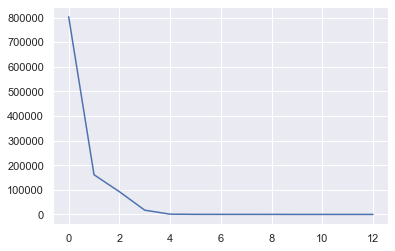

In [324]:
plt.plot(S**2);

In [325]:
np.set_printoptions(suppress=True)

## Explained Variance

In [328]:
((S**2) / sum(S**2))

array([0.74624358, 0.14978765, 0.08579553, 0.01600233, 0.00101308,
       0.00033007, 0.0002508 , 0.000222  , 0.0001764 , 0.00005928,
       0.0000475 , 0.0000406 , 0.00003118])

## 3D plot

PC1 corresponds to df4: 74.6%

PC2 corresponds to df7: 15.0%

PC3 corresponds to df3: 8.6%

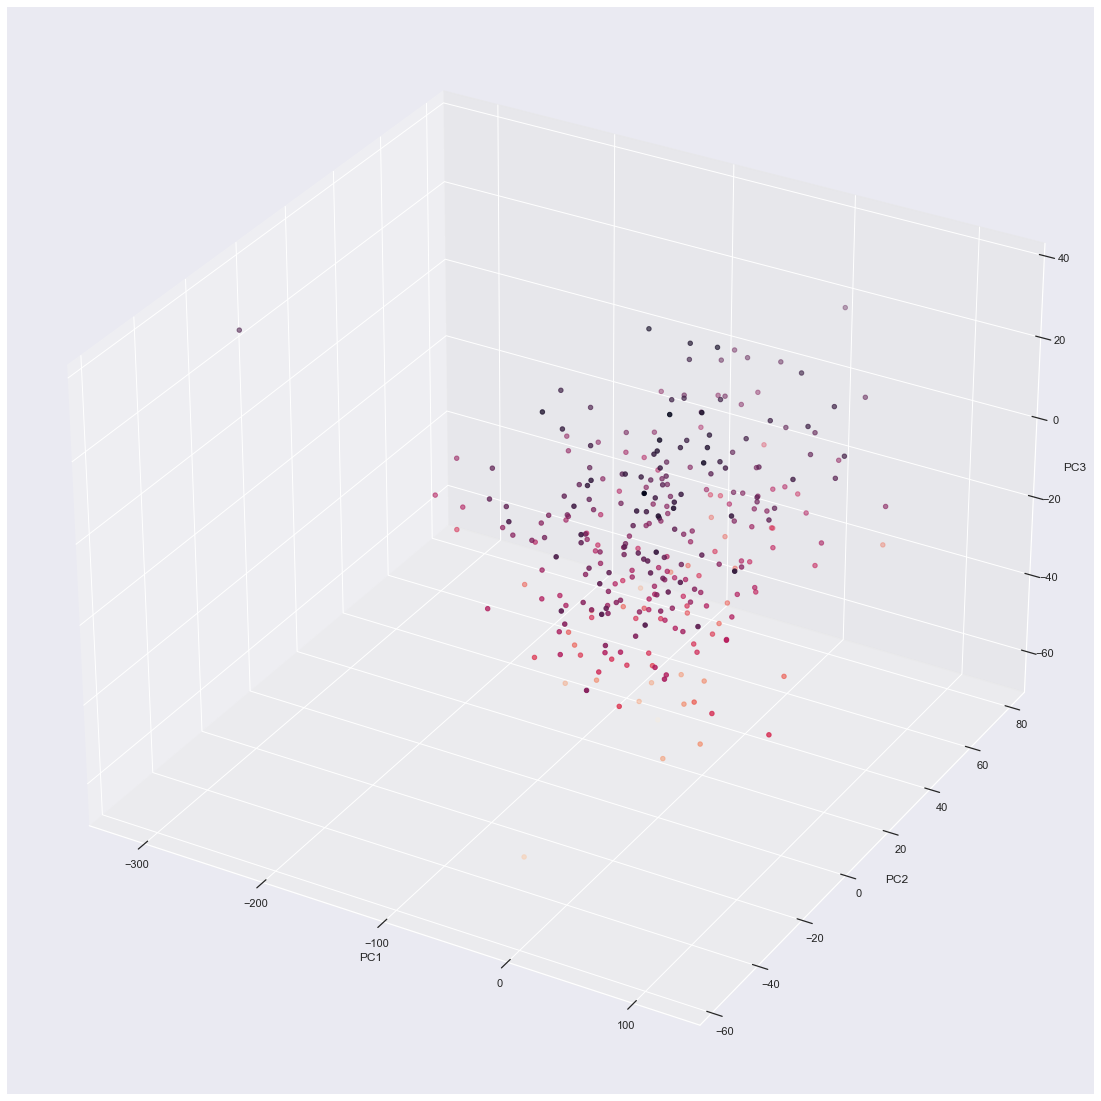

In [333]:
#Extract top 3 PCs
pc1 = pcs[:, 0]
pc2 = pcs[:, 1]
pc3 = pcs[:, 2]

#3D set up
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

#Color based on a PC component
ax.scatter(pc1, pc2, pc3, c=centered_data[3])
plt.show()